<a href="https://colab.research.google.com/github/paulocarvalhoprcf/dataset-tcc/blob/main/arquivo2_TCC_2025_Univesp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('dataset.csv')
dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7951 entries, 1994-07-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  7951 non-null   float64
 1   S&P500   7951 non-null   float64
 2   XAU/USD  7951 non-null   float64
 3   Crude    7951 non-null   float64
 4   CPI      7951 non-null   float64
 5   IBOV     7951 non-null   int64  
 6   IPCA     7951 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 496.9 KB


In [ ]:
dados.head()

BRL/USD  S&P500  XAU/USD  Crude    CPI  IBOV   IPCA
Data                                                           
1994-07-01   0.9625   446.2   386.95  17.57  148.4  3581  148.4
1994-07-04   0.9350   446.2   386.95  17.47  148.4  3623  148.4
1994-07-05   0.9250   446.4   386.05  17.38  148.4  3581  148.4
1994-07-06   0.9100   446.1   383.95  17.06  148.4  3564  148.4
1994-07-07   0.9080   448.4   384.65  17.08  148.4  3754  148.4

In [ ]:
dados2 = pd.read_csv('dataset2.csv')
dados2['Data'] = pd.to_datetime(dados2['Data'])
dados2.set_index('Data', inplace=True)
dados2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  6390 non-null   float64
 1   EFFR     6390 non-null   float64
 2   SELIC    6390 non-null   float64
dtypes: float64(3)
memory usage: 199.7 KB


In [ ]:
dados2['SELIC - EFFR'] = dados2['SELIC'] - dados2['EFFR']
dados2.head()

BRL/USD  EFFR  SELIC  SELIC - EFFR
Data                                          
2000-07-03    1.813  7.03  17.26         10.23
2000-07-04    1.808  7.03  17.22         10.19
2000-07-05    1.802  6.52  17.23         10.71
2000-07-06    1.800  6.51  17.28         10.77
2000-07-07    1.799  6.42  17.28         10.86

In [ ]:
dados_filtrados = dados.loc['2000-07-03':'2024-12-31']
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  6390 non-null   float64
 1   S&P500   6390 non-null   float64
 2   XAU/USD  6390 non-null   float64
 3   Crude    6390 non-null   float64
 4   CPI      6390 non-null   float64
 5   IBOV     6390 non-null   int64  
 6   IPCA     6390 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 399.4 KB


In [ ]:
dados_filtrados.head()

BRL/USD  S&P500  XAU/USD  Crude    CPI   IBOV    IPCA
Data                                                             
2000-07-03    1.813  1469.5   287.90  31.10  172.8  16747  207.12
2000-07-04    1.808  1469.5   286.75  29.58  172.8  17106  207.12
2000-07-05    1.802  1446.2   284.15  29.38  172.8  17285  207.12
2000-07-06    1.800  1456.7   283.50  29.67  172.8  17148  207.12
2000-07-07    1.799  1478.9   283.65  29.70  172.8  17352  207.12

In [ ]:
dados2_unicos = dados2.drop(columns=['BRL/USD'])
dados_unificados = pd.concat([dados_filtrados, dados2_unicos], axis=1)
dados_unificados

BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA  EFFR  \
Data                                                                          
2000-07-03   1.8130  1469.50   287.90  31.10  172.800   16747  207.12  7.03   
2000-07-04   1.8080  1469.50   286.75  29.58  172.800   17106  207.12  7.03   
2000-07-05   1.8020  1446.20   284.15  29.38  172.800   17285  207.12  6.52   
2000-07-06   1.8000  1456.70   283.50  29.67  172.800   17148  207.12  6.51   
2000-07-07   1.7990  1478.90   283.65  29.70  172.800   17352  207.12  6.42   
...             ...      ...      ...    ...      ...     ...     ...   ...   
2024-12-25   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22  4.33   
2024-12-26   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22  4.33   
2024-12-27   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22  4.33   
2024-12-30   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22  4.33   
2024-12-31   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22  4.33   

            SELIC  SELIC - EFFR  
Data                             
2000-07-03  17.26         10.23  
2000-07-04  17.22         10.19  
2000-07-05  17.23         10.71  
2000-07-06  17.28         10.77  
2000-07-07  17.28         10.86  
...           ...           ...  
2024-12-25  12.15          7.82  
2024-12-26  12.15          7.82  
2024-12-27  12.15          7.82  
2024-12-30  12.15          7.82  
2024-12-31  12.15          7.82  

[6390 rows x 10 columns]

In [ ]:
dados_unificados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BRL/USD       6390 non-null   float64
 1   S&P500        6390 non-null   float64
 2   XAU/USD       6390 non-null   float64
 3   Crude         6390 non-null   float64
 4   CPI           6390 non-null   float64
 5   IBOV          6390 non-null   int64  
 6   IPCA          6390 non-null   float64
 7   EFFR          6390 non-null   float64
 8   SELIC         6390 non-null   float64
 9   SELIC - EFFR  6390 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 549.1 KB


In [ ]:
dados_unificados

BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA  EFFR  \
Data                                                                          
2000-07-03   1.8130  1469.50   287.90  31.10  172.800   16747  207.12  7.03   
2000-07-04   1.8080  1469.50   286.75  29.58  172.800   17106  207.12  7.03   
2000-07-05   1.8020  1446.20   284.15  29.38  172.800   17285  207.12  6.52   
2000-07-06   1.8000  1456.70   283.50  29.67  172.800   17148  207.12  6.51   
2000-07-07   1.7990  1478.90   283.65  29.70  172.800   17352  207.12  6.42   
...             ...      ...      ...    ...      ...     ...     ...   ...   
2024-12-25   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22  4.33   
2024-12-26   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22  4.33   
2024-12-27   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22  4.33   
2024-12-30   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22  4.33   
2024-12-31   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22  4.33   

            SELIC  SELIC - EFFR  
Data                             
2000-07-03  17.26         10.23  
2000-07-04  17.22         10.19  
2000-07-05  17.23         10.71  
2000-07-06  17.28         10.77  
2000-07-07  17.28         10.86  
...           ...           ...  
2024-12-25  12.15          7.82  
2024-12-26  12.15          7.82  
2024-12-27  12.15          7.82  
2024-12-30  12.15          7.82  
2024-12-31  12.15          7.82  

[6390 rows x 10 columns]

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

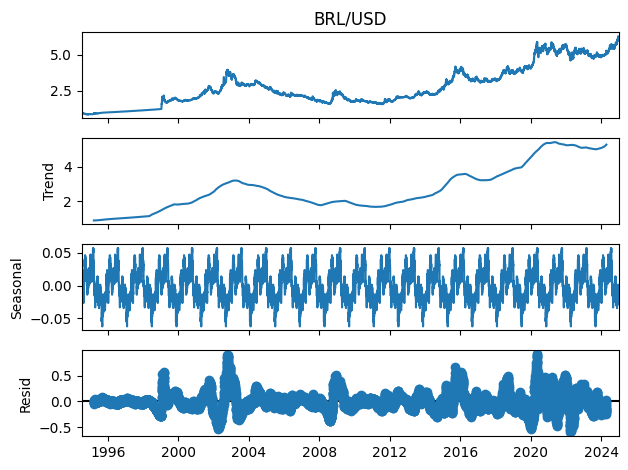

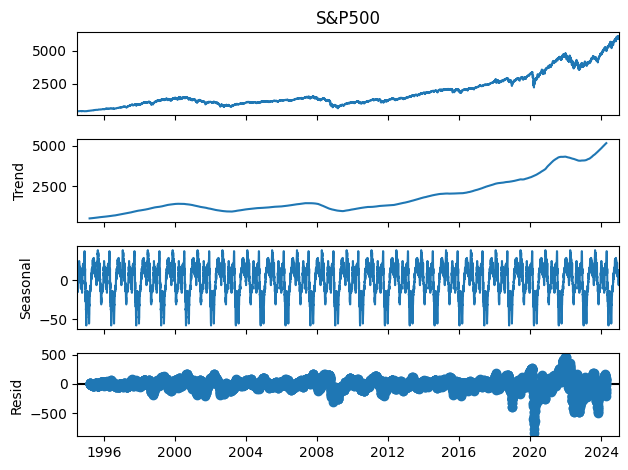

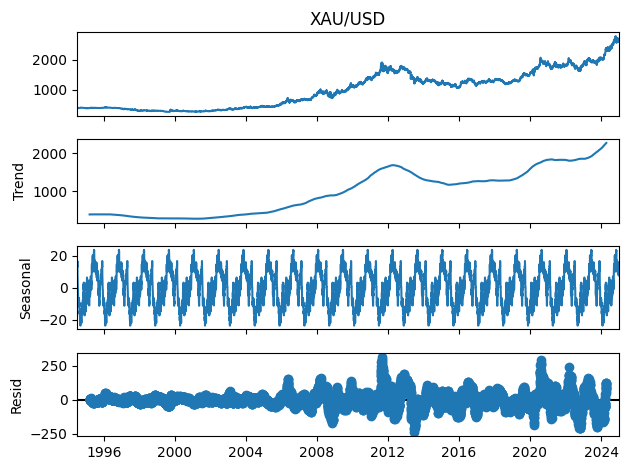

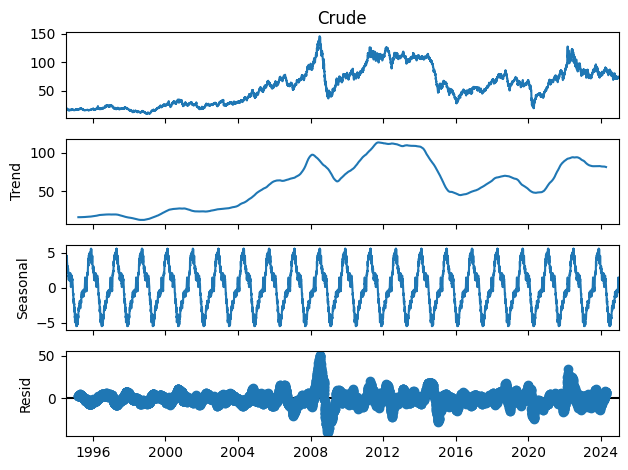

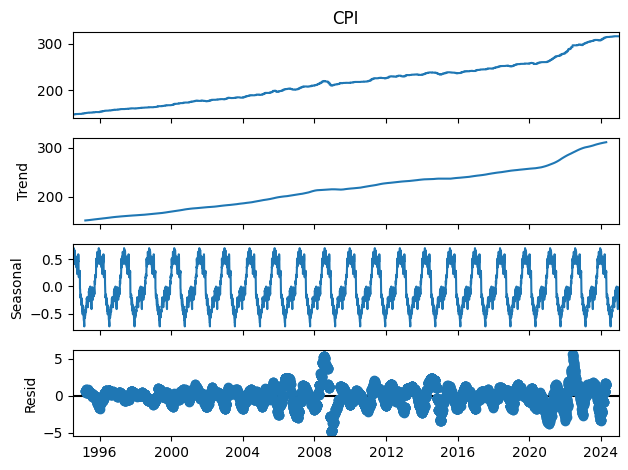

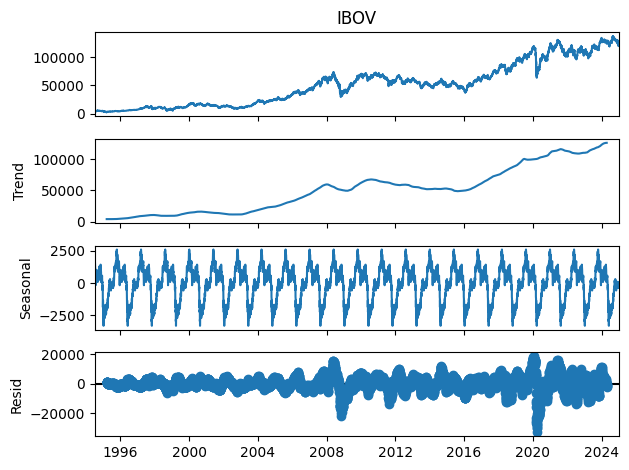

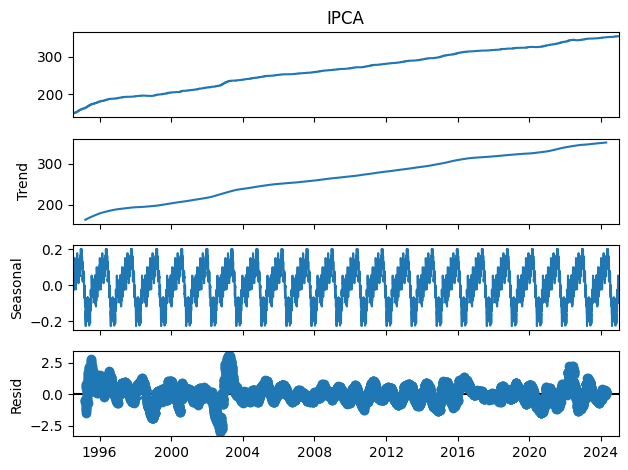

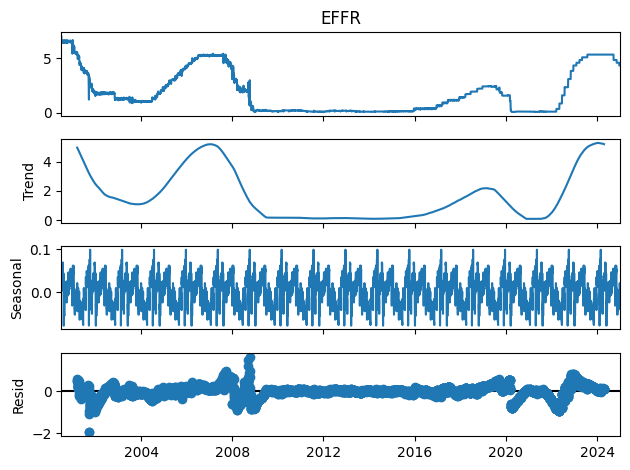

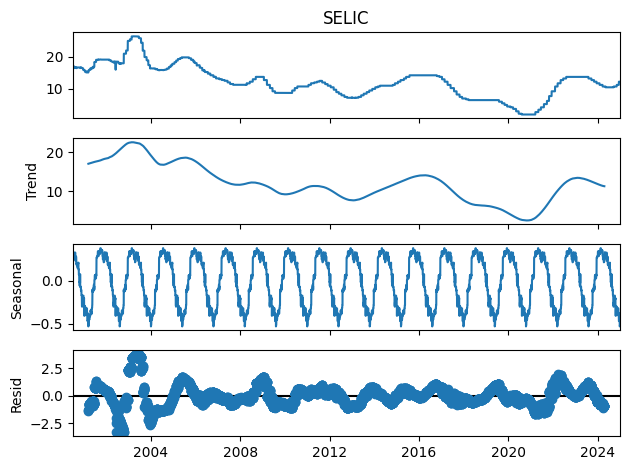

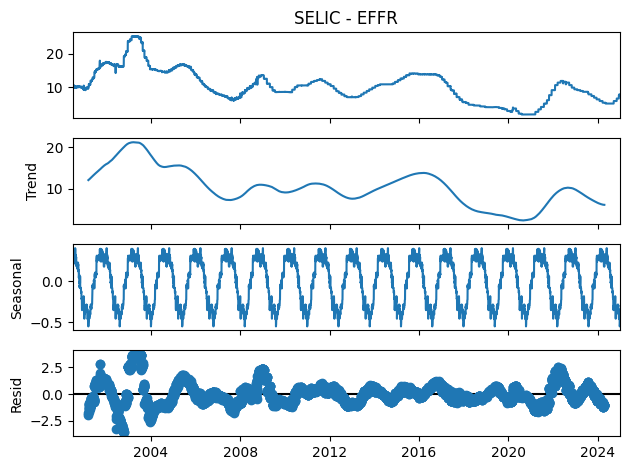

In [ ]:
conjuntos = ['variaveis_1', 'variaveis_2']
variaveis_1 = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA']
variaveis_2 = ['EFFR', 'SELIC', 'SELIC - EFFR']

for i in conjuntos:
  if i == 'variaveis_1':
    dados_internos = dados
    colecao = variaveis_1
  else:
    dados_internos = dados2
    colecao = variaveis_2
  for j in colecao:
    resultado = seasonal_decompose(dados_internos[f'{j}'], model='additive', period=365)
    resultado.plot()
    plt.savefig(f'decompose_{j.replace("/", "_")}')
    plt.show()

Ol√°! üëã Posso te ajudar com exemplos de an√°lise de s√©ries hist√≥ricas utilizando o seasonal_decompose do statsmodels.

O seasonal_decompose √© uma fun√ß√£o muito √∫til para decompor uma s√©rie temporal em seus componentes: tend√™ncia, sazonalidade e res√≠duos. Isso ajuda na compreens√£o do comportamento da s√©rie e facilita a identifica√ß√£o de padr√µes.

Segue alguns exemplos de como voc√™ pode utilizar o seasonal_decompose:

1. An√°lise da sazonalidade de vendas de um produto:

Vamos supor que voc√™ tenha dados de vendas di√°rias de um produto ao longo de v√°rios anos. Voc√™ pode usar o seasonal_decompose para identificar se existe um padr√£o sazonal nas vendas, como um aumento nas vendas durante o Natal ou em outras datas comemorativas.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_vendas' √© o seu DataFrame com as vendas e a data como √≠ndice
resultado = seasonal_decompose(dados_vendas['Vendas'], model='additive', period=365)

# Visualize os componentes
resultado.plot()

Use o c√≥digo com cuidado

2. Identifica√ß√£o de tend√™ncias no n√∫mero de visitantes de um site:

Se voc√™ possui dados do n√∫mero de visitantes di√°rios de um site, o seasonal_decompose pode te ajudar a identificar se existe uma tend√™ncia de crescimento ou queda no n√∫mero de visitantes ao longo do tempo.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_visitas' √© o seu DataFrame com o n√∫mero de visitas e a data como √≠ndice
resultado = seasonal_decompose(dados_visitas['Visitas'], model='additive', period=7) # period=7 para sazonalidade semanal

# Visualize os componentes
resultado.plot()

Use o c√≥digo com cuidado

3. An√°lise da sazonalidade no consumo de energia el√©trica:

Com dados de consumo de energia el√©trica, voc√™ pode usar o seasonal_decompose para identificar padr√µes sazonais, como um aumento no consumo durante o ver√£o devido ao uso de ar condicionado.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_energia' √© o seu DataFrame com o consumo de energia e a data como √≠ndice
resultado = seasonal_decompose(dados_energia['Consumo'], model='additive', period=365) # period=365 para sazonalidade anual


# Visualize os componentes
resultado.plot()

Use o c√≥digo com cuidado

Lembre-se:

    Ajustar o par√¢metro period: √â importante definir o per√≠odo da sazonalidade de acordo com seus dados. Por exemplo, se voc√™ tem dados di√°rios com sazonalidade anual, use period=365.
    Escolher o modelo: O seasonal_decompose oferece dois modelos: additive e multiplicative. O modelo additive √© usado quando a sazonalidade √© constante ao longo do tempo, enquanto o modelo multiplicative √© usado quando a sazonalidade aumenta ou diminui com o tempo.

Espero que esses exemplos te ajudem a utilizar o seasonal_decompose para suas an√°lises de s√©ries hist√≥ricas! üòâ

Ok, vamos explorar os gr√°ficos seasonal e resid produzidos pelo seasonal_decompose e como avali√°-los:

Gr√°fico Seasonal:

Este gr√°fico representa o componente sazonal da sua s√©rie temporal. Ele mostra os padr√µes que se repetem ao longo de um determinado per√≠odo, como dias, semanas, meses ou anos, dependendo do valor que voc√™ definiu para o par√¢metro period no seasonal_decompose.

Como avaliar:

    Padr√µes: Observe se existem padr√µes claros e repetitivos no gr√°fico. Por exemplo, se voc√™ estiver analisando dados de vendas semanais, pode ver picos nas vendas aos finais de semana e quedas durante a semana.
    Amplitude: Verifique a amplitude da sazonalidade, ou seja, a diferen√ßa entre os valores mais altos e mais baixos do padr√£o sazonal. Uma amplitude maior indica uma sazonalidade mais forte.
    Frequ√™ncia: Identifique a frequ√™ncia da sazonalidade, ou seja, quantas vezes o padr√£o se repete em um determinado per√≠odo. Por exemplo, se o padr√£o se repete a cada 7 dias, a frequ√™ncia √© semanal.
    Consist√™ncia: Avalie se o padr√£o sazonal √© consistente ao longo do tempo ou se h√° varia√ß√µes. Mudan√ßas na amplitude ou frequ√™ncia podem indicar mudan√ßas no comportamento da s√©rie temporal.

Gr√°fico Resid (Res√≠duos):

Este gr√°fico representa os res√≠duos da decomposi√ß√£o, ou seja, a parte da s√©rie temporal que n√£o √© explicada pela tend√™ncia e pela sazonalidade. Idealmente, os res√≠duos devem ser aleat√≥rios e sem nenhum padr√£o.

Como avaliar:

    Aleatoriedade: Verifique se os res√≠duos parecem aleat√≥rios, sem nenhum padr√£o claro. Se houver padr√µes nos res√≠duos, pode indicar que a decomposi√ß√£o n√£o capturou completamente a estrutura da s√©rie temporal.
    M√©dia zero: A m√©dia dos res√≠duos deve ser pr√≥xima de zero. Se a m√©dia for significativamente diferente de zero, pode indicar a presen√ßa de um vi√©s na decomposi√ß√£o.
    Vari√¢ncia constante: A vari√¢ncia dos res√≠duos deve ser constante ao longo do tempo. Se a vari√¢ncia mudar, pode indicar a presen√ßa de heterocedasticidade, o que pode afetar a precis√£o das previs√µes.
    Autocorrela√ß√£o: Verifique se h√° autocorrela√ß√£o nos res√≠duos, ou seja, se os valores dos res√≠duos em um determinado momento est√£o correlacionados com os valores em momentos anteriores. A presen√ßa de autocorrela√ß√£o pode indicar que ainda h√° informa√ß√µes na s√©rie temporal que n√£o foram capturadas pela decomposi√ß√£o.

Em resumo:

Ao avaliar os gr√°ficos seasonal e resid, voc√™ busca identificar padr√µes sazonais claros e res√≠duos aleat√≥rios. Isso indica que a decomposi√ß√£o foi bem-sucedida em separar os componentes da s√©rie temporal, o que pode auxiliar na an√°lise e previs√£o do seu conjunto de dados. üòâ


https://rpubs.com/caiocgonc/granger#:~:text=O%20teste%20de%20Granger%20%C3%A9%20utilizado%20para,causa%20Y%2C%20mas%20Y%20n%C3%A3o%20causa%20X.

In [ ]:
correlation_matrix = dados_unificados.corr()
correlation_matrix

BRL/USD    S&P500   XAU/USD     Crude       CPI      IBOV  \
BRL/USD       1.000000  0.879378  0.594043 -0.129413  0.756290  0.698515   
S&P500        0.879378  1.000000  0.792841  0.202790  0.917127  0.885214   
XAU/USD       0.594043  0.792841  1.000000  0.574423  0.923853  0.898471   
Crude        -0.129413  0.202790  0.574423  1.000000  0.445643  0.460348   
CPI           0.756290  0.917127  0.923853  0.445643  1.000000  0.936735   
IBOV          0.698515  0.885214  0.898471  0.460348  0.936735  1.000000   
IPCA          0.740357  0.860869  0.904240  0.404000  0.969089  0.911161   
EFFR          0.070625  0.195847 -0.174646 -0.163256  0.010327  0.019653   
SELIC        -0.294381 -0.453886 -0.681990 -0.440931 -0.570181 -0.702117   
SELIC - EFFR -0.337014 -0.555560 -0.640940 -0.393584 -0.600482 -0.742297   

                  IPCA      EFFR     SELIC  SELIC - EFFR  
BRL/USD       0.740357  0.070625 -0.294381     -0.337014  
S&P500        0.860869  0.195847 -0.453886     -0.555560  
XAU/USD       0.904240 -0.174646 -0.681990     -0.640940  
Crude         0.404000 -0.163256 -0.440931     -0.393584  
CPI           0.969089  0.010327 -0.570181     -0.600482  
IBOV          0.911161  0.019653 -0.702117     -0.742297  
IPCA          1.000000 -0.142236 -0.642779     -0.613335  
EFFR         -0.142236  1.000000  0.305692     -0.093687  
SELIC        -0.642779  0.305692  1.000000      0.919303  
SELIC - EFFR -0.613335 -0.093687  0.919303      1.000000

In [ ]:
dados_selecionados = dados_unificados.drop(columns=['SELIC', 'EFFR'])

variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_selecionados[f'{i}'])
  print(f'An√°lise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores cr√≠ticos:', resultado_adf[4])
  print('------------------------------')

An√°lise de Estacionariedade para BRL/USD:
ADF Statistic: 0.08247693085287434
p-value: 0.9648441472400525
Valores cr√≠ticos: {'1%': np.float64(-3.431374257100065), '5%': np.float64(-2.861992632517701), '10%': np.float64(-2.5670109331140742)}
------------------------------
An√°lise de Estacionariedade para S&P500:
ADF Statistic: 2.5506719215648817
p-value: 0.9990643896718125
Valores cr√≠ticos: {'1%': np.float64(-3.431378445347648), '5%': np.float64(-2.861994483038544), '10%': np.float64(-2.567011918188529)}
------------------------------
An√°lise de Estacionariedade para XAU/USD:
ADF Statistic: 0.27091093096758884
p-value: 0.9759698215824241
Valores cr√≠ticos: {'1%': np.float64(-3.4313739363396754), '5%': np.float64(-2.8619924907939316), '10%': np.float64(-2.5670108576712973)}
------------------------------
An√°lise de Estacionariedade para Crude:
ADF Statistic: -2.173954624588118
p-value: 0.21583384038008546
Valores cr√≠ticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2

In [ ]:
dados_transformados = dados_selecionados.apply(np.log)
dados_transformados.head()

BRL/USD    S&P500   XAU/USD     Crude       CPI      IBOV  \
Data                                                                     
2000-07-03  0.594983  7.292677  5.662613  3.437208  5.152135  9.725974   
2000-07-04  0.592221  7.292677  5.658611  3.387098  5.152135  9.747185   
2000-07-05  0.588897  7.276695  5.649502  3.380314  5.152135  9.757594   
2000-07-06  0.587787  7.283929  5.647212  3.390136  5.152135  9.749637   
2000-07-07  0.587231  7.299054  5.647741  3.391147  5.152135  9.761463   

                IPCA  SELIC - EFFR  
Data                                
2000-07-03  5.333298      2.325325  
2000-07-04  5.333298      2.321407  
2000-07-05  5.333298      2.371178  
2000-07-06  5.333298      2.376764  
2000-07-07  5.333298      2.385086

In [ ]:
variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_transformados[f'{i}'])
  print(f'An√°lise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores cr√≠ticos:', resultado_adf[4])
  print('------------------------------')

An√°lise de Estacionariedade para BRL/USD:
ADF Statistic: -0.44904172609844556
p-value: 0.9015829670068587
Valores cr√≠ticos: {'1%': np.float64(-3.4313760248806426), '5%': np.float64(-2.861993413588082), '10%': np.float64(-2.5670113488956)}
------------------------------
An√°lise de Estacionariedade para S&P500:
ADF Statistic: 0.7593834724795796
p-value: 0.9909514304028293
Valores cr√≠ticos: {'1%': np.float64(-3.431376991698968), '5%': np.float64(-2.861993840763728), '10%': np.float64(-2.567011576290944)}
------------------------------
An√°lise de Estacionariedade para XAU/USD:
ADF Statistic: -1.1140324063554083
p-value: 0.7094436258176077
Valores cr√≠ticos: {'1%': np.float64(-3.4313739363396754), '5%': np.float64(-2.8619924907939316), '10%': np.float64(-2.5670108576712973)}
------------------------------
An√°lise de Estacionariedade para Crude:
ADF Statistic: -2.226579091217224
p-value: 0.1967405733790567
Valores cr√≠ticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2.8

In [ ]:
dados_diferenciados = dados_transformados.diff().dropna()
dados_diferenciados.head()

BRL/USD    S&P500   XAU/USD     Crude  CPI      IBOV  IPCA  \
Data                                                                      
2000-07-04 -0.002762  0.000000 -0.004002 -0.050109  0.0  0.021210   0.0   
2000-07-05 -0.003324 -0.015983 -0.009108 -0.006784  0.0  0.010410   0.0   
2000-07-06 -0.001110  0.007234 -0.002290  0.009822  0.0 -0.007958   0.0   
2000-07-07 -0.000556  0.015125  0.000529  0.001011  0.0  0.011826   0.0   
2000-07-10 -0.003341 -0.002234  0.001057 -0.029037  0.0  0.015327   0.0   

            SELIC - EFFR  
Data                      
2000-07-04     -0.003918  
2000-07-05      0.049771  
2000-07-06      0.005587  
2000-07-07      0.008322  
2000-07-10     -0.033711

In [ ]:
variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_diferenciados[f'{i}'])
  print(f'An√°lise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores cr√≠ticos:', resultado_adf[4])
  print('------------------------------')

An√°lise de Estacionariedade para BRL/USD:
ADF Statistic: -34.626159615629
p-value: 0.0
Valores cr√≠ticos: {'1%': np.float64(-3.4313748992241146), '5%': np.float64(-2.861992916231742), '10%': np.float64(-2.567011084141501)}
------------------------------
An√°lise de Estacionariedade para S&P500:
ADF Statistic: -18.952757673269456
p-value: 0.0
Valores cr√≠ticos: {'1%': np.float64(-3.4313768304360686), '5%': np.float64(-2.861993769511899), '10%': np.float64(-2.567011538361968)}
------------------------------
An√°lise de Estacionariedade para XAU/USD:
ADF Statistic: -33.57684677026498
p-value: 0.0
Valores cr√≠ticos: {'1%': np.float64(-3.4313748992241146), '5%': np.float64(-2.861992916231742), '10%': np.float64(-2.567011084141501)}
------------------------------
An√°lise de Estacionariedade para Crude:
ADF Statistic: -35.65347834238714
p-value: 0.0
Valores cr√≠ticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2.861992845269893), '10%': np.float64(-2.567011046366896)}
-------

In [ ]:
# Inicializando o modelo VAR com seus dados
model = VAR(dados_diferenciados)

# Sele√ß√£o do melhor n√∫mero de lags com base no BIC
lag_order = model.select_order(maxlags=20)  # Voc√™ pode ajustar maxlags conforme necess√°rio
print(lag_order.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -80.70      -80.69   8.972e-36      -80.70
1       -81.23     -81.16*   5.262e-36     -81.21*
2       -81.24      -81.10   5.215e-36      -81.19
3       -81.25      -81.04   5.183e-36      -81.17
4       -81.25      -80.97   5.150e-36      -81.16
5       -81.25      -80.90   5.160e-36      -81.13
6       -81.25      -80.84   5.152e-36      -81.11
7       -81.25      -80.76   5.184e-36      -81.08
8       -81.25      -80.70   5.157e-36      -81.06
9       -81.25      -80.63   5.171e-36      -81.04
10      -81.25      -80.57   5.156e-36      -81.01
11      -81.25      -80.49   5.194e-36      -80.98
12      -81.26      -80.43   5.145e-36      -80.97
13      -81.25      -80.36   5.159e-36      -80.94
14      -81.25      -80.29   5.165e-36      -80.92
15      -81.25      -80.22   5.177e-36      -80.89
16      -81.25      -80.15   5.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
max_lag = 2  # Ajuste esse valor conforme necess√°rio

variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  for j in variaveis:
    if i != j:
      print('------------------------------')
      print(f'Testando se {i} causa {j}')
      granger_test_result = grangercausalitytests(dados_selecionados[[i, j]], max_lag)
      print('------------------------------')
      print('------------------------------')

------------------------------
Testando se BRL/USD causa S&P500

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4480  , p=0.0021  , df_denom=6386, df_num=1
ssr based chi2 test:   chi2=9.4524  , p=0.0021  , df=1
likelihood ratio test: chi2=9.4454  , p=0.0021  , df=1
parameter F test:         F=9.4480  , p=0.0021  , df_denom=6386, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5294  , p=0.0108  , df_denom=6383, df_num=2
ssr based chi2 test:   chi2=9.0658  , p=0.0107  , df=2
likelihood ratio test: chi2=9.0594  , p=0.0108  , df=2
parameter F test:         F=4.5294  , p=0.0108  , df_denom=6383, df_num=2
------------------------------
------------------------------
------------------------------
Testando se BRL/USD causa XAU/USD

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7104  , p=0.0997  , df_denom=6386, df_num=1
ssr based chi2 test:   chi2=2.7116  , p=0.0996  , df=1
likelihood ratio test: chi

O AIC (Akaike Information Criterion) √© usado para selecionar o melhor modelo no teste de causalidade de Granger, ajudando a determinar o n√∫mero de defasagens (lags) a incluir no modelo VAR (Vector Autoregression). O AIC busca equilibrar o ajuste do modelo com a sua complexidade, penalizando modelos com muitos par√¢metros.
Como o AIC √© usado no teste de Granger:

    1. Determinar o n√∫mero de defasagens:
    O AIC ajuda a determinar o n√∫mero ideal de defasagens (lags) a incluir no modelo VAR. Modelos VAR s√£o utilizados para analisar a rela√ß√£o entre s√©ries temporais, assumindo que o valor presente de uma s√©rie √© influenciado pelos seus valores passados, bem como pelos valores passados de outras s√©ries.
    2. Modelos com menos defasagens s√£o preferidos:
    O AIC penaliza modelos com mais par√¢metros (no caso de modelos VAR, o n√∫mero de defasagens √© um par√¢metro), incentivando a escolha de modelos mais simples, desde que o ajuste n√£o seja comprometido significativamente.
    3. Sele√ß√£o do modelo:
    Ao usar o AIC, calcula-se o valor para diferentes modelos VAR com diferentes n√∫meros de defasagens. O modelo com o menor valor do AIC √© considerado o melhor, ou seja, o modelo que melhor equilibra o ajuste com a complexidade.

Em resumo: O AIC ajuda a escolher o modelo VAR mais adequado para o teste de causalidade de Granger, garantindo que o n√∫mero de defasagens seja otimizado, evitando overfitting (ajuste excessivo aos dados).
Por que o AIC √© importante:

    Evita overfitting:
    Modelos com muitas defasagens podem ajustar-se demasiado aos dados da amostra, o que pode levar a previs√µes pouco precisas para dados fora da amostra.
    Melhora a interpretabilidade:
    Modelos com menos defasagens s√£o mais f√°ceis de interpretar e de comunicar.
    Aumenta a robustez:
    Modelos mais simples tendem a ser mais robustos e a gerar previs√µes mais precisas em diferentes contextos.
